# Course Project: Data Analysis

In this project you will perform data analysis on a sample containing data from 100000 people. Data analysis often involves grouping, aggregating, and computing descriptive statistics on sub-sets of your data. In this project you will answer the question: what variables are most important in predicting the prevalence of diabetes in your sample? Does this change based on gender or age-group? The data used in this project comes from [here](https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset).

During this project you will apply all that you have learned during the course. You can already start making useful progress after the first few lessons. During the course you will have opportunity to work on the project.

---

## Software prerequisites

This project involves plotting so you will need to install a plotting library.
 * [Matplotlib](https://matplotlib.org/) A general purpose visualisation library for Python

Please ask your instructors for help installing this with the `pip` command.

---

## Part 1: The understanding the data

The dataset you will analyse is a table containing 100000 rows (each row is data measured from one person at a single time-point) and 6 columns (variables for each person in your sample). Those columns are:

* `gender`: Either "Other","Female", or "Male".
* `age`: The age of the person in years.
* `bmi`: Body Mass Index, a measure of body fat based on height and weight (kg/m²)
* `hbA1c_level`: Hemoglobin A1c level, a measure of blood sugar control over the past 2-3 months (%)
* `blood_glucose_level`: Fasting blood glucose level (mg/dL)
* `diabetes`: Whether the individual has been diagnosed with diabetes (0 = No, 1 = Yes)

Let's start by just looking at the data. In the following code cell, read all of the text from the file and inspect the first 2 lines.

In [ ]:
from pathlib import Path
data = Path("diabetes/diabetes_dataset.csv").read_text().splitlines()
data[:2]

['gender,age,bmi,hbA1c_level,blood_glucose_level,diabetes',
 'Female,32,27.32,5,100,0']

You should see a list containing 2 strings. Before you can dive into your data analysis you will need to write some functions to prepare the data for analysis. Your first task is to write a function to convert the strings "0" and "1" into boolean values and return `None` when the function argument is not "0" or "1".

In [5]:
def str_to_bool(string: str) -> bool | None:
    if string == "0":
        return False
    elif string == "1":
        return True
    else:
        return None
        
assert str_to_bool("0") == False
assert str_to_bool("1") == True
assert str_to_bool("2") == None
assert str_to_bool("a") == None
assert str_to_bool("") == None

Next you will need a function that can recognise an individual character, (e.g. `'7'` or `'a'`) as a digit or not. Write a function called, `is_character_a_digit` that accepts a string and returns `True` only if the string only contains a single character and that character is a decimal digit.

In [1]:
def is_character_a_digit(char: str) -> bool:
    """Check that the input string contains a single digit."""
    return char.isdigit()

assert is_character_a_digit("0") == True
assert is_character_a_digit("1") == True
assert is_character_a_digit("2") == True
assert is_character_a_digit("a") == False
assert is_character_a_digit("") == False

Some the the values in each row is text (e.g. "Female"), others are numbers. Next, write a function to check if your input string can be safely converted into a number. If it cannot be converted into a number return `False`, otherwise return `True`.

In [2]:
def is_str_a_number(string: str) -> bool:
    data = string.strip()
    if len(data) == 0:
        return False
    count_dot = 0
    for char in range(len(data)):
        if data[char] == "-":
            if char > 0:
                return False
        elif data[char] == ".":
            count_dot += 1
            if count_dot > 1:
                return False
        elif not is_character_a_digit(data[char]):
            return False
    return True

assert is_str_a_number("0") == True
assert is_str_a_number("1") == True
assert is_str_a_number("2") == True
assert is_str_a_number("a") == False
assert is_str_a_number("") == False
assert is_str_a_number("1.0") == True
assert is_str_a_number("-1.0") == True
assert is_str_a_number("1-1") == False
assert is_str_a_number("1.1.1") == False
assert is_str_a_number("-1.1") == True
assert is_str_a_number("1.") == True
assert is_str_a_number(".1") == True
assert is_str_a_number(" ") == False

### Reading and validating rows of data

When you read rows from the table of data, each row will be represented as a dictionary. The keys will be `"gender", "age", "bmi"` etc. Unfortunately the values will also be strings. So your next task will be to use the `str_to_bool` and `is_str_a_number` functions you wrote above to clean up the row dictionaries.

In [7]:
# Write a function to clean up a dictionary of demographic data
def clean_row(datum: dict[str, str]) -> dict[str, str | float | bool] | None:
    result = {}
    for key in datum:
        value = datum[key]
        if str_to_bool(value) is not None:
            result[key] = str_to_bool(value)
        elif is_str_a_number(value):
            result[key] = float(value)
        else:
            result[key] = value
    return result

In order to correctly extract the sample data from the file you will use Python's built-in `csv` library.

In [ ]:
import csv

with Path("diabetes/diabetes_dataset.csv").open() as resource:
    reader = csv.DictReader(resource)
    data = []
    for row in reader:
        data.append(clean_row(row))

data[:2]

[{'gender': 'Female',
  'age': 32.0,
  'bmi': 27.32,
  'hbA1c_level': 5.0,
  'blood_glucose_level': 100.0,
  'diabetes': False},
 {'gender': 'Female',
  'age': 29.0,
  'bmi': 19.95,
  'hbA1c_level': 5.0,
  'blood_glucose_level': 90.0,
  'diabetes': False}]

## Part 2: Analysing the data

Now that you have processed the data into a useful Python data structure (of type `list[dict[str, str | float | bool]]`), you can begin analysing the data. Let's start by writing some useful filtering and statistics functions. Assuming the data is normally distributed, here are the equations for sample mean and variance, write functions implementing these equations:

$$\overline{\mathbf{x}} = \mu = \frac{1}{n} \sum_i^n x_i$$

$$\mathrm{Var}(\mathbf{x}) = \frac{1}{n} \sum_i^n (x_i - \mu)^2$$

In [8]:
def mean(data: list[float]) -> float:
    return sum(data) / len(data)

In [9]:
def variance(data: list[float]) -> float:
    mean_value = mean(data)
    summed = 0
    for datum in data:
        summed += (datum - mean_value) ** 2
    return summed / len(data)

In order to understand how (a subset of) the data is dictributed it is useful to be able to describe the range of values in a column. Write a function called `describe` that accepts (a subset of) the dataset as a parameter and computes the mean and variance of each numeric column and all possible unique values in each text column. For example, if the input is:

```python
[{"gender": "Male", "age": 25.0, "diabetes": True},{"gender": "Female", "age": 30.0, "diabetes": False}]
```

Your function should print:

```python
variables: "gender", "age", "diabetes"
values: ["Male", "Female"], [25.0, 30.0], [False, True]
mean: N/A, 27.5, 0.5
variance: N/A, 6.25, 0.25
```

Notice that the variables that only contain text values display the text "N/A" (short for "Not Applicable") for mean and variance. Variables that have numeric values display [minimum, maximum] in the "values" row. Boolean values can be treated as numeric for the purposes of "mean" and "variance" since `False == 0` and `True == 1`.

In [12]:
import math

def describe(data: list[dict[str, str | float | bool]]) -> None:
    print("variables:", ", ".join(list(data[0].keys())))
    # Now print the range of values
    all_values = []
    for variable in data[0].keys():
        values = []
        for datum in data:
            if type(datum[variable]) in [bool, float]:
                if len(values) == 0:
                    values = [datum[variable], datum[variable]]
                elif datum[variable] < values[0]:
                    values[0] = datum[variable]
                elif datum[variable] > values[1]:
                    values[1] = datum[variable]
            elif datum[variable] not in values:
                values.append(datum[variable])

        all_values.append(str(values))
    print("values:", ", ".join(all_values))
    
    # Now print the mean for each variable
    means = []
    for variable in data[0].keys():
        values = []
        for datum in data:
            if type(datum[variable]) in [bool, float]:
                values.append(datum[variable])
        if len(values) > 0:
            means.append(str(mean(values)))
        else:
            means.append("N/A")
    print("means:", ", ".join(means))

    # Now print the variance for each variable
    variances = []
    for variable in data[0].keys():
        values = []
        for datum in data:
            if type(datum[variable]) in [bool, float]:
                values.append(datum[variable])
        if len(values) > 0:
            variances.append(str(variance(values)))
        else:
            variances.append("N/A")
    print("variances:", ", ".join(variances))

In [13]:
describe([{"gender": "Male", "age": 25.0, "diabetes": True},{"gender": "Female", "age": 30.0, "diabetes": False}])

variables: gender, age, diabetes
values: ['Male', 'Female'], [25.0, 30.0], [False, True]
means: N/A, 27.5, 0.5
variances: N/A, 6.25, 0.25


Let's use this on the real sample data now:

In [15]:
describe(data)

variables: gender, age, bmi, hbA1c_level, blood_glucose_level, diabetes
values: ['Female', 'Male', 'Other'], [0.08, 80.0], [10.01, 95.69], [3.5, 9.0], [80.0, 300.0], [False, True]
means: N/A, 41.885856000000004, 27.3207671, 5.527507, 138.05806, 0.085
variances: N/A, 507.00300772317325, 44.04645365057337, 1.1463272649502552, 1657.1357690361572, 0.07777500000010536


What does this tell you about the number of people with and without diabetes in this dataset?

Before being able to fully explore the dataset you will need one more tool. Visualisation is another useful tool to explore data, so let's make some plots. Using the `matplotlib` library, you can make box and whisker plots. Here is an example:

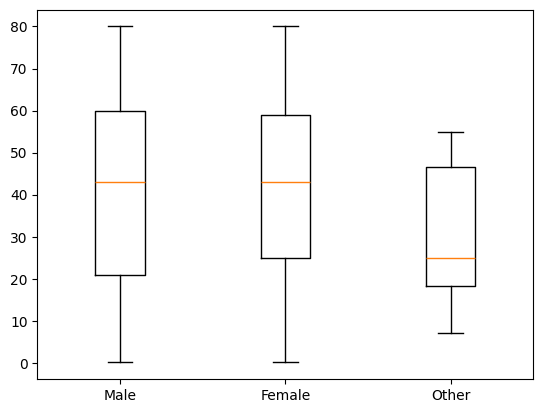

In [24]:
import matplotlib.pyplot as plt

def filter_gender(datum: list[dict[str, str | bool | float]], gender: str) -> list[dict[str, str | float | bool]]:
    filtered = []
    for datum in data:
        if datum["gender"] == gender:
            filtered.append(datum)
    return filtered

def extract_variable(data: list[dict[str, str | float | bool]], variable: str) -> list[float | str | bool]:
    values = []
    for datum in data:
        values.append(datum[variable])
    return values

data_to_plot = {
    "Male": extract_variable(filter_gender(data, "Male"), "age"),
    "Female": extract_variable(filter_gender(data, "Female"), "age"),
    "Other": extract_variable(filter_gender(data, "Other"), "age"),
}

_ = plt.boxplot(list(data_to_plot.values()), tick_labels=list(data_to_plot.keys()))

Now you should use these tools to explore the sampled data. Here are some questions you could try to answer to start you off:

* What is the average age of the entire sample? Females? Males?
* What is the average age of all people with diabetes? Females only? Males only?
* What is the distribution of blood glucose level between those with and without diabetes?

## Part 3: What predicts a diabetes diagnosis?

Finally! Now that you have a good understanding of your data you can try to correlate the variables. One way of computing (linear) correlation between variables is the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($r$).

$$r_{xy} = \frac{\sum_i^n (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_i^n (x_i - \overline{x})^2} \sqrt{\sum_i^n (y_i - \overline{y})^2}}$$

Write a function to compute the correlation coefficient ($r$) for a pair of variables ($x$ and $y$ in the above equation).

In [26]:
import math

def pearson_correlation(x: list[float], y: list[float]) -> float:
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = 0
    denominator_x = 0
    denominator_y = 0
    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator_x += (x[i] - x_mean) ** 2
        denominator_y += (y[i] - y_mean) ** 2
    return numerator / math.sqrt(denominator_x * denominator_y)


Now you can compute the linear correlation between the pairs of variables you consider important based on your explorations in part 2. Once you do this, plot a heatmap of the correlation coefficients. What variable(s) best predict a diabetes diagnosis?

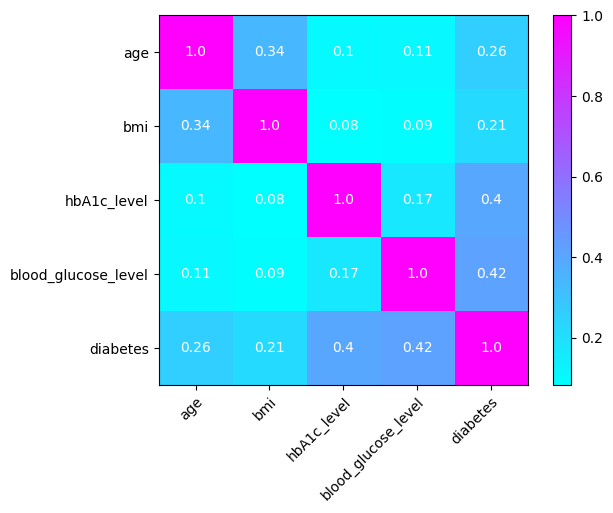

In [35]:
correlation_matrix = []
interesting_variables = ["age", "bmi", "hbA1c_level", "blood_glucose_level", "diabetes"]
for i in range(len(interesting_variables)):
    i_data = extract_variable(data, interesting_variables[i])
    row = []
    for j in range(len(interesting_variables)):
        j_data = extract_variable(data, interesting_variables[j])
        row.append(pearson_correlation(i_data, j_data))
    correlation_matrix.append(row)

plt.imshow(correlation_matrix, cmap="cool", interpolation="none")
plt.xticks(range(len(interesting_variables)), labels=interesting_variables,
              rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(range(len(interesting_variables)), labels=interesting_variables)
_ = plt.colorbar()
for i in range(len(interesting_variables)):
    for j in range(len(interesting_variables)):
        text = plt.text(j, i, round(correlation_matrix[i][j], 2),
                       ha="center", va="center", color="w")

plt.show()